In [284]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm

In [285]:
train = pd.read_csv('Train.csv')
test  = pd.read_csv('Test.csv')

In [286]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [287]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [288]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Employee_ID']
test_ID = test['Employee_ID']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Employee_ID", axis = 1, inplace = True)
test.drop("Employee_ID", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (7000, 24) 
The test data size before dropping Id feature is : (3000, 23) 

The train data size after dropping Id feature is : (7000, 23) 
The test data size after dropping Id feature is : (3000, 22) 


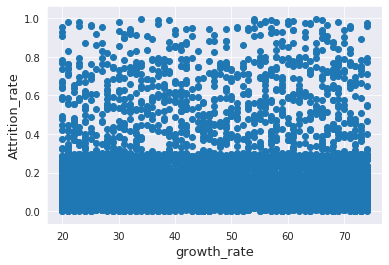

In [289]:
#Data_preprocessing
fig, ax = plt.subplots()
ax.scatter(x = train['growth_rate'], y = train['Attrition_rate'])
plt.ylabel('Attrition_rate', fontsize=13)
plt.xlabel('growth_rate', fontsize=13)
plt.show()


 mu = 0.19 and sigma = 0.19



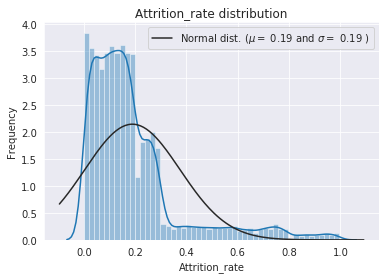

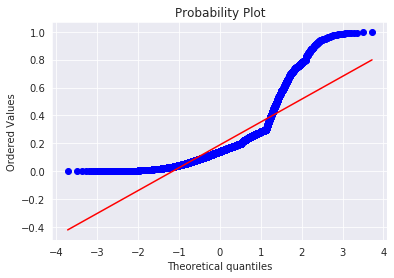

In [290]:
sns.distplot(train['Attrition_rate'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Attrition_rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Attrition_rate distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Attrition_rate'], plot=plt)
plt.show()

In [291]:
print("The skewness of Attrition_rate is {}".format(train['Attrition_rate'].skew()))

The skewness of Attrition_rate is 2.056875960544357



 mu = 0.16 and sigma = 0.14



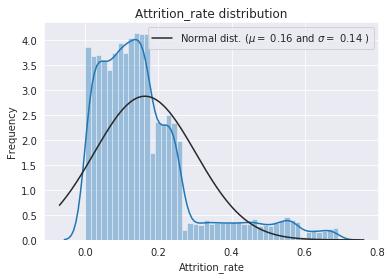

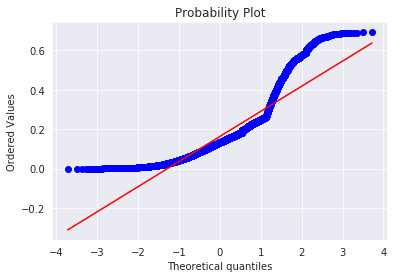

The skewness after cube-root tranformation is 1.6278514877192267


In [292]:
#log transformation
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["Attrition_rate"] = np.log1p(train["Attrition_rate"])

#Check the new distribution 
sns.distplot(train['Attrition_rate'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Attrition_rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Attrition_rate distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Attrition_rate'], plot=plt)
plt.show()

print("The skewness after cube-root tranformation is {}".format(train['Attrition_rate'].skew()))

In [293]:
#feature Engineering

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Attrition_rate.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Attrition_rate'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (10000, 22)


In [294]:
all_data.head()

,Age,Compensation_and_Benefits,Decision_skill_possess,Education_Level,Gender,Hometown,Pay_Scale,Post_Level,Relationship_Status,Time_of_service,...,Unit,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Work_Life_balance,growth_rate
0,42.0,type2,Conceptual,4,F,Franklin,7.0,1,Married,4.0,...,IT,4,0.7516,1.8688,2.0,4,5,3,3.0,33
1,24.0,type2,Analytical,3,M,Springfield,6.0,3,Single,5.0,...,Logistics,3,-0.9612,-0.4537,2.0,3,5,3,4.0,36
2,58.0,type2,Conceptual,3,F,Clinton,8.0,2,Married,27.0,...,Quality,4,-0.9612,-0.4537,3.0,3,8,3,1.0,51
3,26.0,type2,Behavioral,3,F,Lebanon,8.0,3,Single,4.0,...,Human Resource Management,3,-1.8176,-0.4537,NaN,3,7,3,1.0,56
4,31.0,type3,Conceptual,1,F,Springfield,2.0,3,Married,5.0,...,Logistics,1,0.7516,-0.4537,2.0,2,8,2,3.0,62


In [295]:
#missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
VAR4,9.54
VAR2,7.94
Age,5.73
Time_of_service,1.96
Work_Life_balance,0.16
Pay_Scale,0.12


Text(0.5, 1.0, 'Percent missing data by feature')

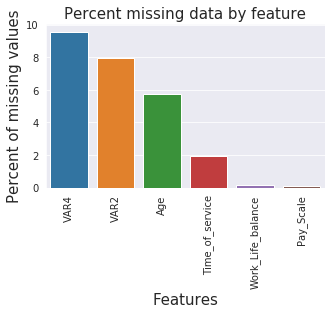

In [296]:
f, ax = plt.subplots(figsize=(5, 3))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

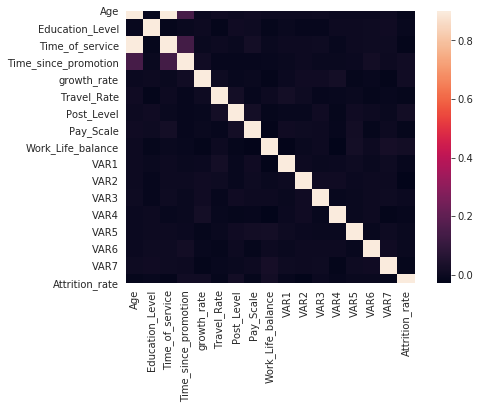

In [298]:
#Correlation map to see how features are correlated with Attration_rate
corrmat = train.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [299]:
all_data['VAR4'] = all_data['VAR4'].fillna('None')
all_data['VAR2'] = all_data['VAR2'].fillna('None')
all_data['Age'] = all_data['Age'].fillna(value=all_data['Age'].median())
all_data['Time_of_service'] = all_data['Time_of_service'].fillna(value=all_data['Time_of_service'].mean())
all_data['Work_Life_balance'] = all_data['Work_Life_balance'].fillna('None')
all_data['Pay_Scale'] = all_data['Pay_Scale'].fillna(value=all_data['Pay_Scale'].mean())

In [300]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [301]:
#dealing with catagerical var
from sklearn.preprocessing import LabelEncoder
cols = ('Gender', 'Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (10000, 22)


In [303]:
#skewed_features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna()) ).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

NameError: ("name 'skew' is not defined", 'occurred at index Age')

In [304]:
#Getting dummy categorical features

all_data = pd.get_dummies(all_data)
print(all_data.shape)

(10000, 35)


In [305]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [138]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 2.0 MB/s eta 0:00:01     |███                             | 112 kB 2.0 MB/s eta 0:00:01


In [306]:
#Modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [307]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [308]:
from sklearn import svm
regr = svm.SVR()
score = rmsle_cv(regr)
print("\nCSV score: {:.4f} ({:.4f})\n".format(score.mean(), score.std())


SyntaxError: unexpected EOF while parsing (<ipython-input-308-ce9e711f47b3>, line 4)

In [208]:
#LASSO Regression :
#This model may be very sensitive to outliers. 
#So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#Elastic Net Regression :
#again made robust to outliers

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


#Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Gradient Boosting Regression :
#With huber loss that makes it robust to outliers

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#XGBoost :
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#LightGBM :
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [209]:
#base_model_score

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1736 (0.0033)



In [210]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1736 (0.0033)



In [211]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Kernel Ridge score: 0.1776 (0.0030)



In [212]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1850 (0.0029)



In [213]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1797 (0.0036)



In [214]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1749 (0.0035)



In [215]:
#Averaged base models class

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


In [216]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1746 (0.0032)



In [217]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [218]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1736 (0.0035)


In [309]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [310]:
#SVM:
regr.fit(train.values, y_train)
y_train_pred = regr.predict(train.values)
y_pred = np.expm1(regr.predict(test))
print(rmsle(y_train, y_train_pred))

0.08003500324782052


In [311]:
y_pred

array([0.42494872, 0.18868095, 0.36897705, ..., 0.1920634 , 0.18055209,
       0.15814724])

In [220]:
#StackedRegressor:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.17263442458749073


In [221]:
#XGBoost:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.14530377579456483


In [222]:
#LightGBM:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))


0.16349675419587678


In [223]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.0+
               xgb_train_pred*1.0 + lgb_train_pred*0.0))

RMSLE score on train data:
0.14530377579456483


In [282]:
ensemble = stacked_pred*0.0 + y_pred*1.0 + lgb_pred*0.0

In [312]:
sub = pd.DataFrame()
sub['Employee_ID'] = test_ID
sub['Attrition_rate'] = y_pred
sub.to_csv('submission.csv',index=False)

In [313]:
submit = pd.read_csv('submission.csv')
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
Employee_ID       3000 non-null object
Attrition_rate    3000 non-null float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB
